In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
filepath_train = './data/train.csv'
df_train = pd.read_csv(filepath_train)
filepath_test = './data/test.csv'
df_test = pd.read_csv(filepath_test)
df_train = df_train.rename(columns={'model year':'model_year','car name':'car_name'})
df_test = df_test.rename(columns={'model year':'model_year','car name':'car_name'})

In [126]:
df_train.describe()

,id,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,200.170854,24.307035,5.296482,183.311558,2883.839196,15.647739,76.165829,1.582915
std,113.432759,7.797665,1.644562,98.400457,819.766870,2.701885,3.802928,0.798932
min,0.000000,9.000000,3.000000,71.000000,1613.000000,8.500000,70.000000,1.000000
25%,98.500000,18.000000,4.000000,98.000000,2217.500000,14.000000,73.000000,1.000000
50%,202.000000,24.000000,4.000000,140.000000,2702.000000,15.500000,76.000000,1.000000
75%,294.500000,30.500000,6.000000,250.000000,3426.500000,17.150000,80.000000,2.000000
max,396.000000,44.600000,8.000000,454.000000,5140.000000,23.700000,82.000000,3.000000


In [4]:
# 参照の参照は好まれないらしい
import copy
df_train_nn = copy.copy(df_train.query('horsepower != "?"'))
df_train_nn['horsepower'] = df_train_nn['horsepower'].astype(float)
df_train_nn = df_train_nn.drop('id',axis=1)
df_train_nn.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
# 各変数の統計量
df_train_nn.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,24.172821,5.323077,184.846154,101.297436,2895.630769,15.596410,76.117949,1.584615
std,7.750685,1.650751,98.749328,35.562255,821.394318,2.693432,3.774772,0.803837
min,9.000000,3.000000,71.000000,46.000000,1613.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,101.000000,75.000000,2220.000000,13.950000,73.000000,1.000000
50%,24.000000,4.000000,140.000000,92.000000,2711.000000,15.500000,76.000000,1.000000
75%,30.250000,6.000000,250.000000,114.000000,3439.000000,17.000000,79.500000,2.000000
max,44.600000,8.000000,454.000000,220.000000,5140.000000,23.700000,82.000000,3.000000


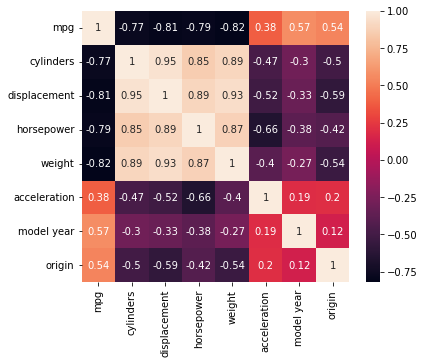

In [6]:
# 相関のヒートマップ
plt.figure(figsize=(6,5))
sns.heatmap(df_train_nn.corr(),annot=True)
plt.show()

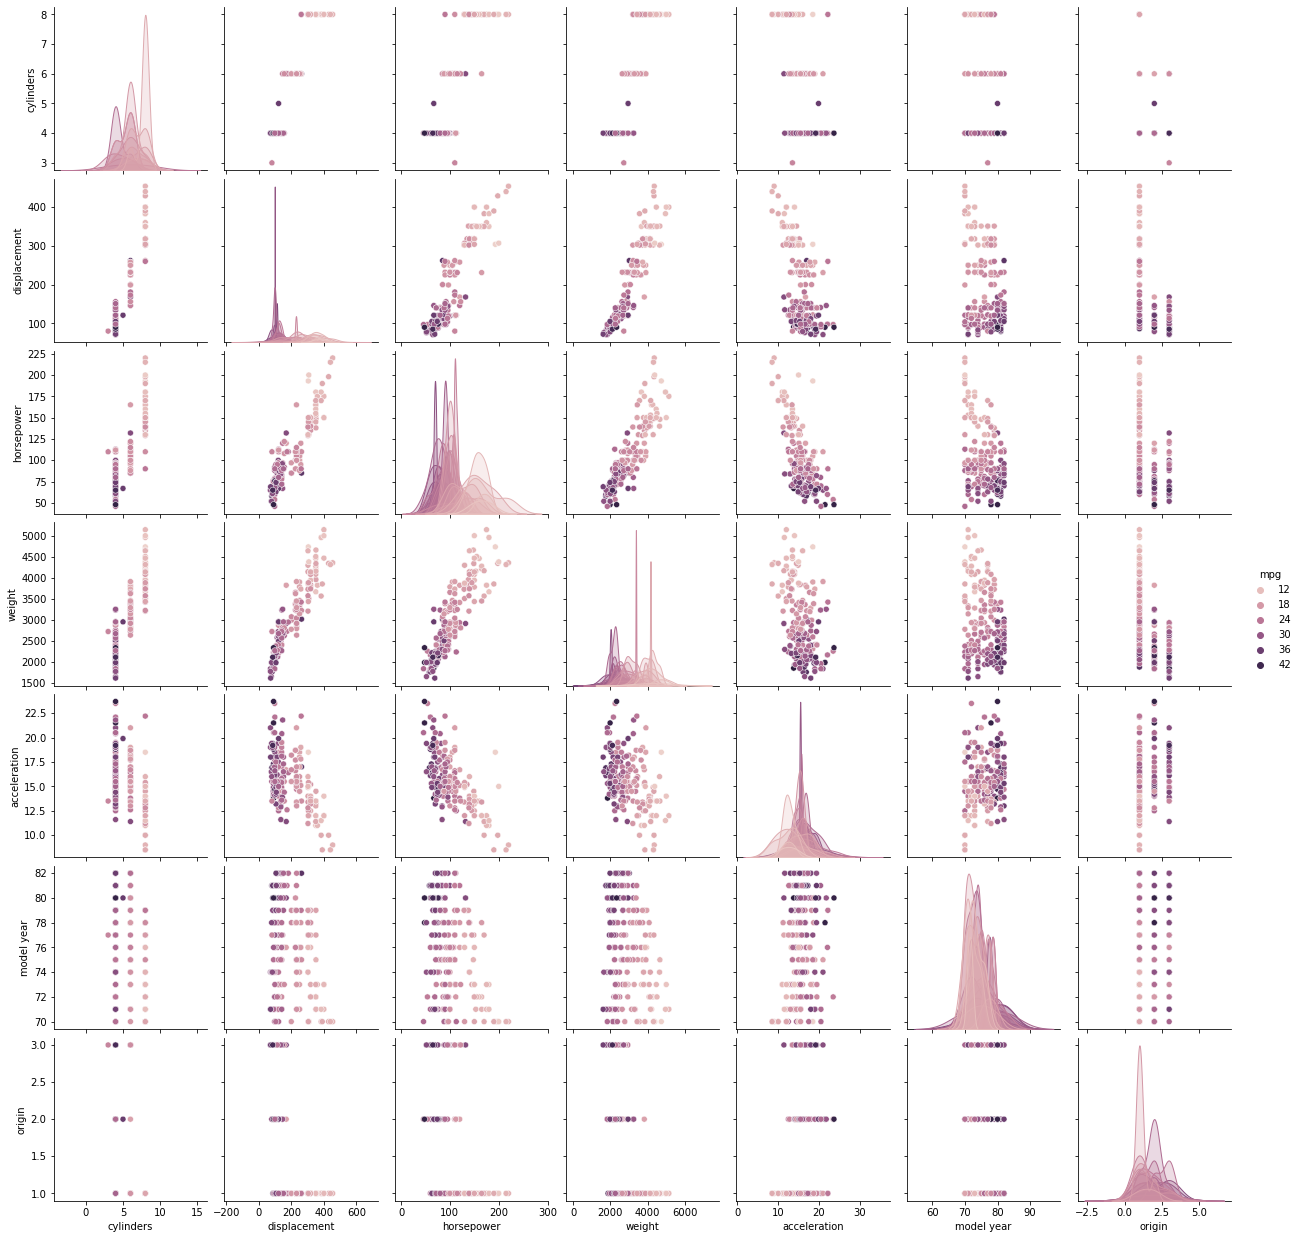

In [7]:
# 散布図一覧
sns.pairplot(data=df_train_nn, hue='mpg')
plt.show()

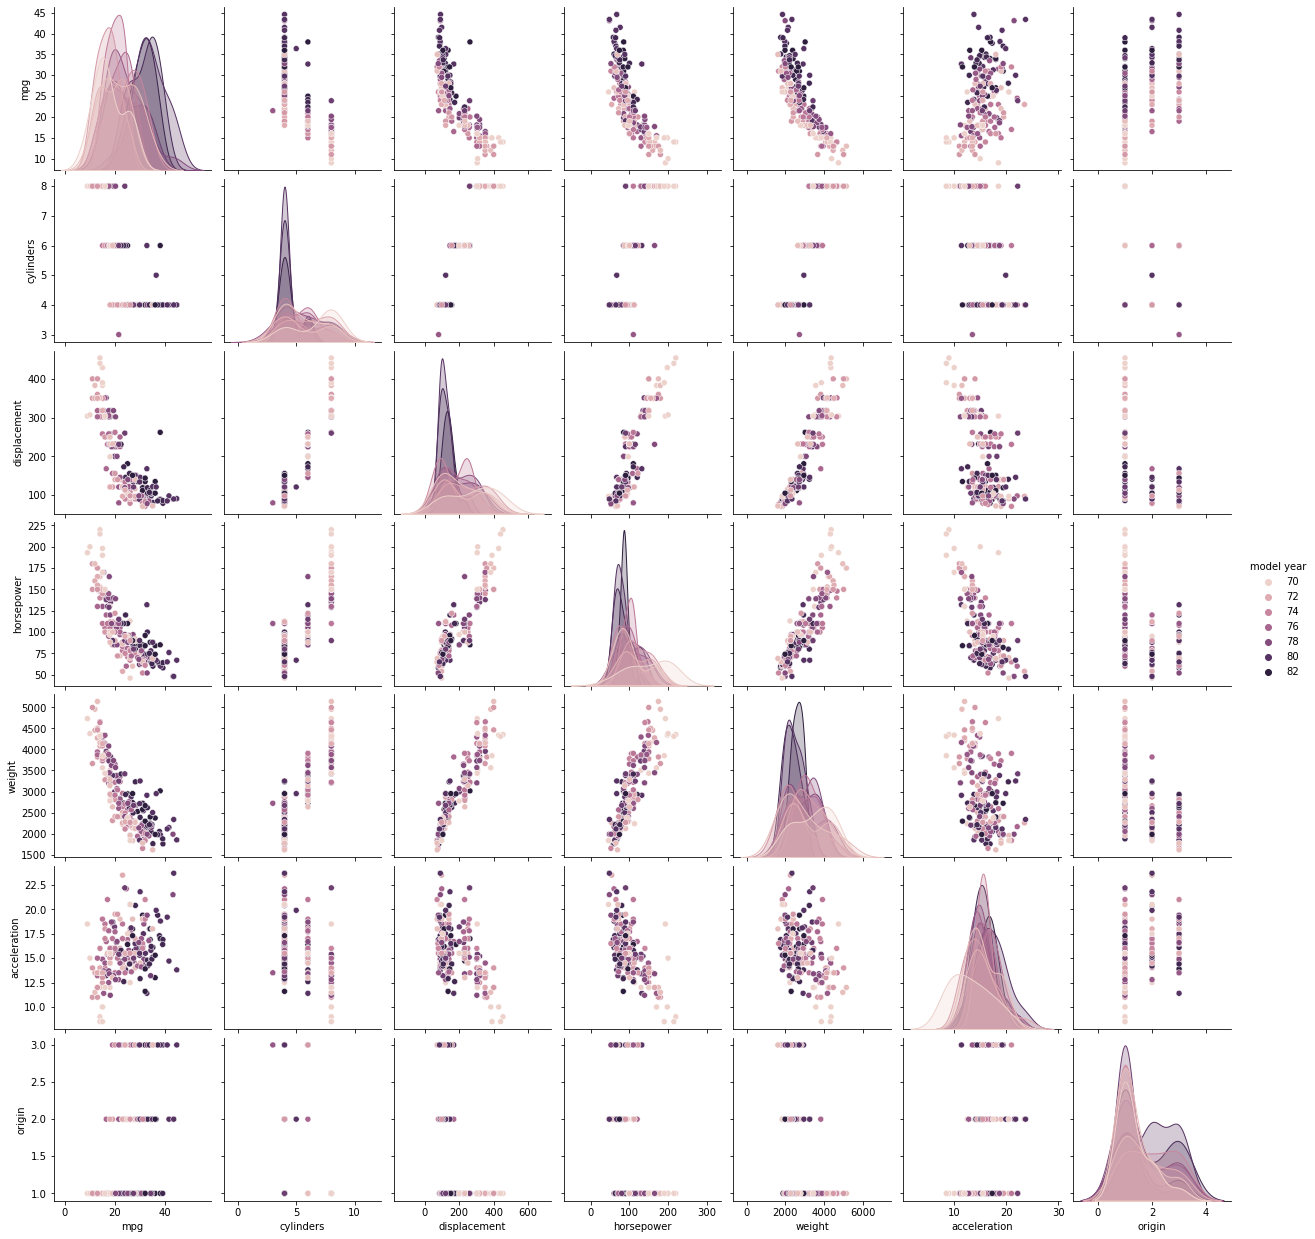

In [8]:
# 散布図一覧
sns.pairplot(data=df_train_nn, hue='model year')
plt.show()

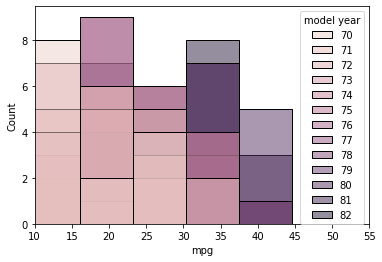

In [9]:
# 時代の変遷と燃費の推移
sns.histplot(data=df_train_nn,x='mpg', bins=5, hue='model year')
plt.xlim(10,55)
plt.show()

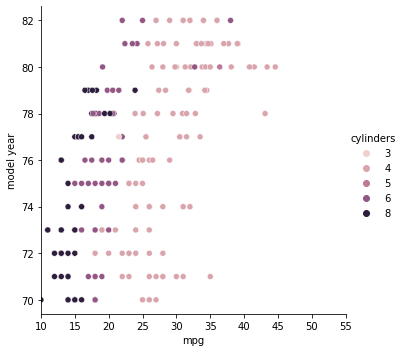

In [10]:
# 時代の変遷と燃費の推移
sns.relplot(data=df_train_nn,x='mpg',y='model year', hue='cylinders')
plt.xlim(10,55)
plt.show()

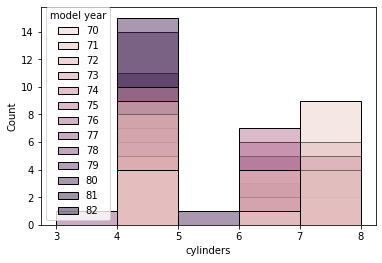

In [11]:
# 時代の変遷とシリンダー
sns.histplot(data=df_train_nn,x='cylinders', bins=5, hue='model year')
plt.show()

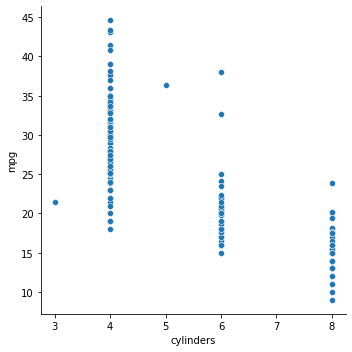

In [12]:
# シリンダーと燃費
sns.relplot(data=df_train_nn,x='cylinders',y='mpg')
plt.show()

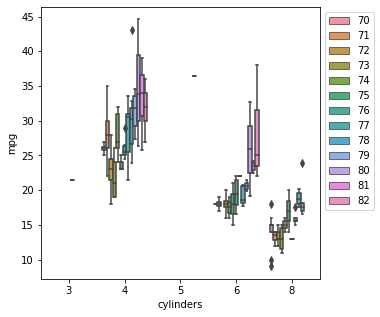

In [13]:
# 時代の変遷とシリンダー、燃費の推移
plt.figure(figsize=(5,5))
sns.boxplot(data=df_train_nn,x='cylinders',y='mpg', hue='model year')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [14]:
plt.legend?

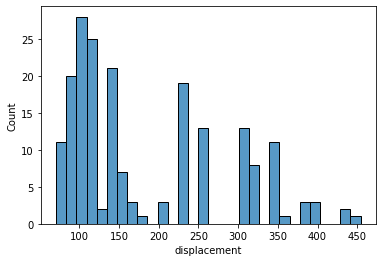

In [15]:
# displacement
sns.histplot(data=df_train_nn,x='displacement', bins=30)
plt.show()

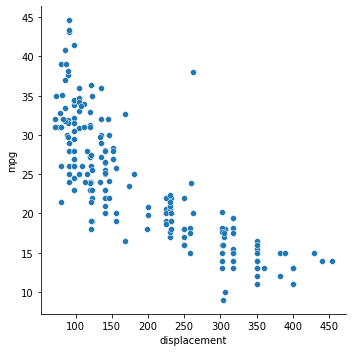

In [16]:
# displacementとmpg
sns.relplot(data=df_train_nn,x='displacement',y='mpg')
plt.show()

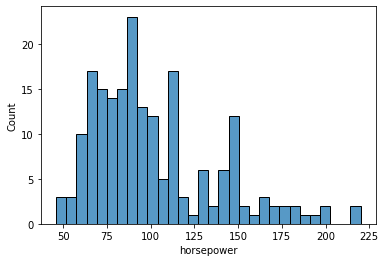

In [17]:
# horsepower
sns.histplot(data=df_train_nn,x='horsepower', bins=30)
plt.show()

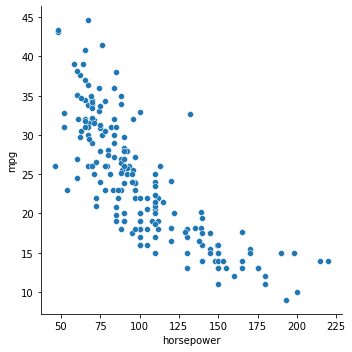

In [18]:
# horsepowerとmpg
sns.relplot(data=df_train_nn,x='horsepower',y='mpg')
plt.show()

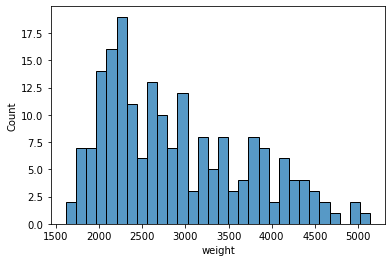

In [19]:
# weight
sns.histplot(data=df_train_nn,x='weight', bins=30)
plt.show()

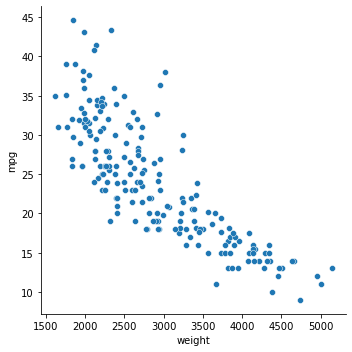

In [20]:
# weightとmpg
sns.relplot(data=df_train_nn,x='weight',y='mpg')
plt.show()

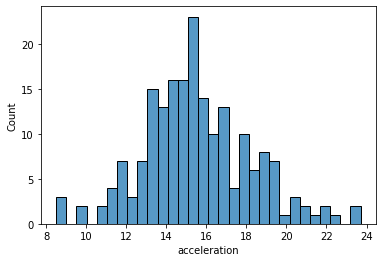

In [21]:
# acceleration
sns.histplot(data=df_train_nn,x='acceleration', bins=30)
plt.show()

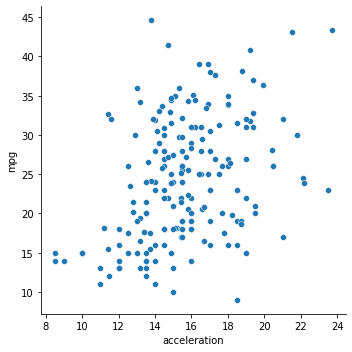

In [22]:
# accelerationとmpg
sns.relplot(data=df_train_nn,x='acceleration',y='mpg')
plt.show()

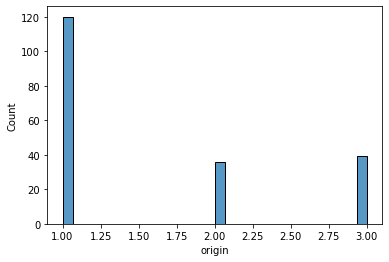

In [23]:
# origin
sns.histplot(data=df_train_nn,x='origin', bins=30)
plt.show()

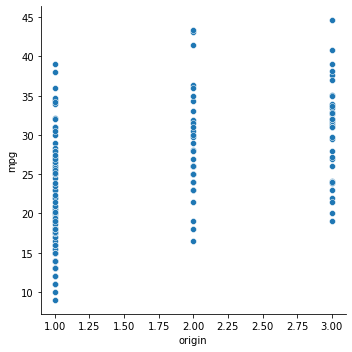

In [24]:
# originとmpg
sns.relplot(data=df_train_nn,x='origin',y='mpg')
plt.show()

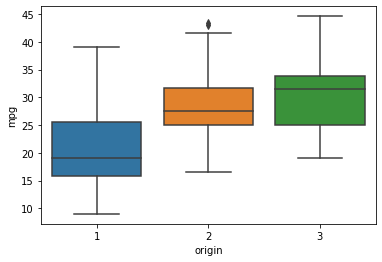

In [25]:
sns.boxplot(data=df_train_nn,x='origin',y='mpg')
plt.show()

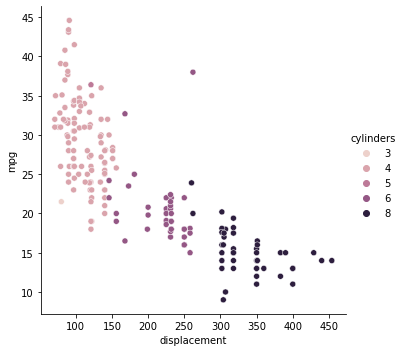

In [26]:
# displacement mpg cylinders
sns.relplot(data=df_train_nn,x='displacement',y='mpg', hue='cylinders')
plt.show()

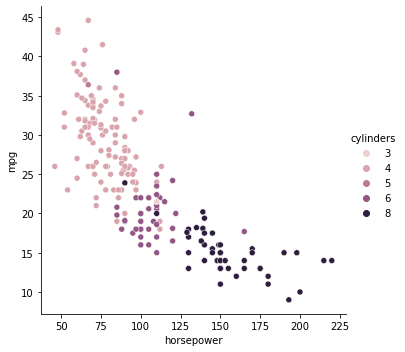

In [27]:
# horsepower mpg cylinders
sns.relplot(data=df_train_nn,x='horsepower',y='mpg', hue='cylinders')
plt.show()

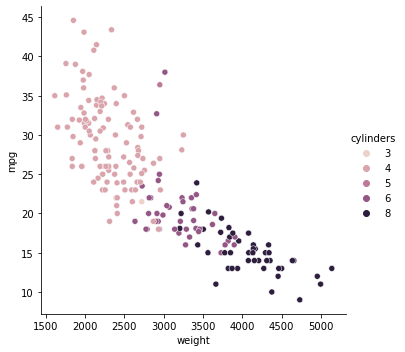

In [28]:
# weight mpg cylinders
sns.relplot(data=df_train_nn,x='weight',y='mpg', hue='cylinders')
plt.show()

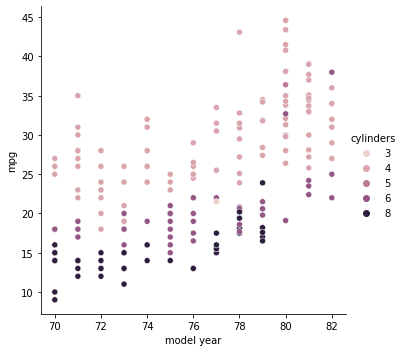

In [29]:
# model year mpg cylinders
sns.relplot(data=df_train_nn,x='model year',y='mpg',hue='cylinders')
plt.show()

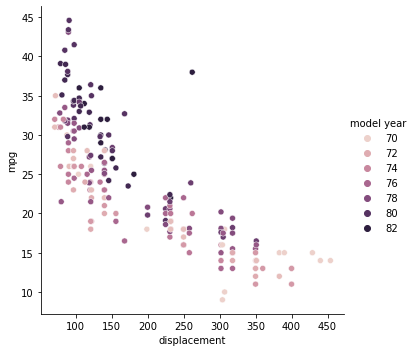

In [30]:
# displacement mpg model year
sns.relplot(data=df_train_nn,x='displacement',y='mpg', hue='model year')
plt.show()

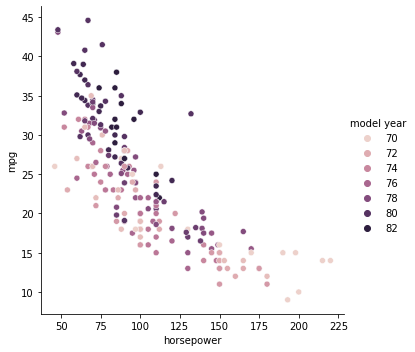

In [31]:
# horsepower mpg model year
sns.relplot(data=df_train_nn,x='horsepower',y='mpg', hue='model year')
plt.show()

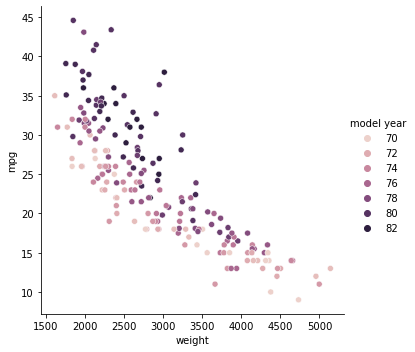

In [32]:
# weight mpg model year
sns.relplot(data=df_train_nn,x='weight',y='mpg', hue='model year')
plt.savefig('./img/scatter.png')
plt.show()

In [33]:
df_train['car name'].values.reshape(-1,1)

array([['dodge aries se'],
       ['vw rabbit custom'],
       ['toyota mark ii'],
       ['dodge colt'],
       ['toyota tercel'],
       ['pontiac phoenix'],
       ['chevroelt chevelle malibu'],
       ['oldsmobile omega'],
       ['bmw 2002'],
       ['dodge st. regis'],
       ['mercedes-benz 280s'],
       ['dodge omni'],
       ['datsun pl510'],
       ['chevrolet impala'],
       ['amc hornet'],
       ['renault 12 (sw)'],
       ['chevrolet chevette'],
       ['chevrolet woody'],
       ['peugeot 505s turbo diesel'],
       ['datsun 280-zx'],
       ['ford pinto'],
       ['mercury cougar brougham'],
       ['subaru'],
       ['chevrolet caprice classic'],
       ['amc concord dl'],
       ['mercury zephyr 6'],
       ['pontiac safari (sw)'],
       ['dodge charger 2.2'],
       ['chevrolet chevelle malibu'],
       ['oldsmobile cutlass ciera (diesel)'],
       ['honda accord cvcc'],
       ['chevrolet chevelle malibu classic'],
       ['volkswagen scirocco'],
       ['toyota 

In [41]:
# toyotaとorigin
df_train[df_train['car name'].str.contains('toyota')][['origin','car name']]

,origin,car name
2,3,toyota mark ii
4,3,toyota tercel
33,3,toyota starlet
35,3,toyota corolla 1200
59,3,toyota corolla
62,3,toyota corolla tercel
105,3,toyota corona
136,3,toyota mark ii
142,3,toyota corona
155,3,toyota corolla 1200


In [42]:
# hondaとorigin
df_train[df_train['car name'].str.contains('honda')][['origin','car name']]

,origin,car name
30,3,honda accord cvcc
48,3,honda civic 1300
49,3,honda civic 1500 gl
96,3,honda civic
169,3,honda accord lx
173,3,honda prelude


線形回帰ってone-hotした方が良くない？

In [43]:
# 単語を空白で切り分けて、最初の単語を取り出してmaker変数とする
df_train_mk = copy.copy(df_train)
for id, name in enumerate(df_train_mk.loc[:,'car name'].str.split()):
    df_train_mk.loc[id,'maker'] = name[0]

In [44]:
# 各メーカーがどのくらいあるのか確認
df_train_mk.sort_values('maker').groupby('origin')['maker'].value_counts(sort=False)

origin  maker        
1       amc              16
        buick             8
        capri             1
        chevroelt         1
        chevrolet        27
        chevy             2
        dodge            18
        ford             20
        hi                1
        mercury           6
        oldsmobile        4
        plymouth         13
        pontiac           5
2       audi              2
        bmw               2
        fiat              4
        mercedes-benz     2
        opel              3
        peugeot           2
        renault           3
        saab              2
        triumph           1
        vokswagen         1
        volkswagen       10
        volvo             2
        vw                4
3       datsun           14
        honda             6
        mazda             3
        subaru            2
        toyota           13
        toyouta           1
Name: maker, dtype: int64

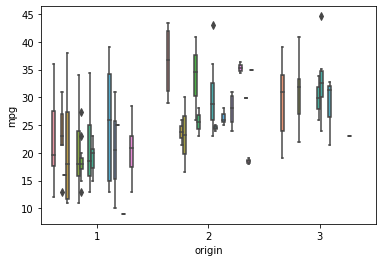

In [45]:
# メーカーごとに燃費に差があるのか？
sns.boxplot(data=df_train_mk, x='origin', y='mpg', hue='maker')
plt.legend().remove()
plt.show()

### 教師無し学習
* kmeans
* デンドログラム
* DBSCAN
* 最近傍法
* DSN 多次元尺度構成法
* UMAP
* 

In [50]:
df_train

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel
...,...,...,...,...,...,...,...,...,...,...
194,384,40.8,4,85.0,65.00,2110.0,19.2,80,3,datsun 210
195,385,20.2,8,302.0,139.0,3570.0,12.8,78,1,mercury monarch ghia
196,387,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
197,395,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)


## kmeans

### 前処理

In [233]:
# horsepowerの?を埋める
mean_group_cy_ye = df_train_nn.groupby(['cylinders','model year']).mean()
df_train_cy_ye = copy.copy(df_train)
df_train_cy_ye.loc[df_train_cy_ye['horsepower']=='?','horsepower'] = df_train[df_train['horsepower']=='?'].apply(lambda x: mean_group_cy_ye.loc[x.cylinders,x.model_year]['horsepower'], axis=1)
df_train_cy_ye.horsepower = df_train_cy_ye.horsepower.astype(float)

In [236]:
df_train_cy_ye[df_train['horsepower']=='?'][['cylinders','model_year','horsepower']]

,cylinders,model_year,horsepower
24,4,82,84.272727
113,4,81,73.285714
145,4,80,72.733333
175,4,71,75.333333


In [193]:
# dfは出力したいDataFrame
# wは横幅、hは縦幅
# outputPathは出力先のパス

def TablePlot(df,w,h,outputPath):
    fig, ax = plt.subplots(figsize=(w,h))
    ax.axis('off')
    ax.table(
        df.values,
        colLabels = df.columns,
        loc = 'center',
        bbox=[0,0,1,1]
    )
    plt.savefig(outputPath)
    plt.show()

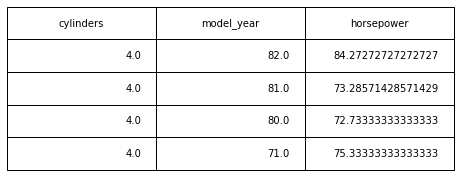

In [237]:
TablePlot(df_train_cy_ye[df_train['horsepower']=='?'][['cylinders','model_year','horsepower']],8,3,'./img/horsepower_cy_ye.png')

In [238]:
# 不要な列の削除
feature_names = ['mpg', 'displacement', 'horsepower', 'weight','acceleration']
df_train_km = df_train_cy_ye[feature_names]

In [239]:
# 標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
km_train_ss = ss.fit_transform(df_train_km)

In [306]:
# kmeans法で分ける
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=3, random_state=0)
KM.fit(km_train_ss)
cluster = KM.predict(km_train_ss)

In [307]:
df_train_km3 = copy.copy(df_train_cy_ye)
df_train_km3['cluster'] = cluster
df_train_km3.groupby('cluster').describe()['displacement']

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,93.0,107.182796,26.575547,71.0,90.0,98.0,120.0,262.0
1,43.0,339.860465,44.341522,231.0,305.0,318.0,351.0,454.0
2,63.0,188.841270,53.107987,80.0,140.0,200.0,232.0,262.0


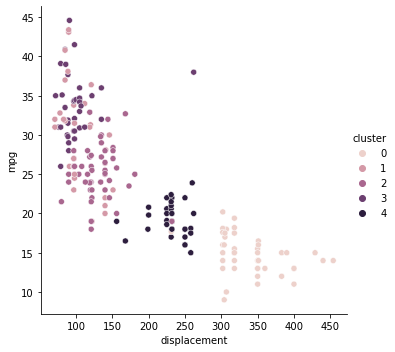

In [286]:
# displacementとcluster
sns.relplot(data=df_train_km3, x='displacement', y='mpg', hue='cluster')
plt.savefig('./img/km3-displacement-cluster.png')
plt.show()

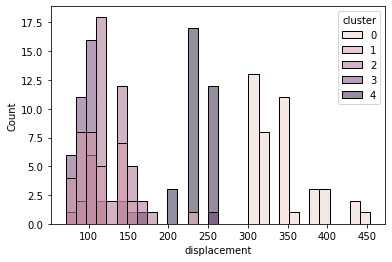

In [287]:
# displacementとcluster ヒストグラム
sns.histplot(data=df_train_km3, x='displacement', hue='cluster', bins=30)
plt.savefig('./img/km3-displacement-cluster-hist.png')
plt.show()

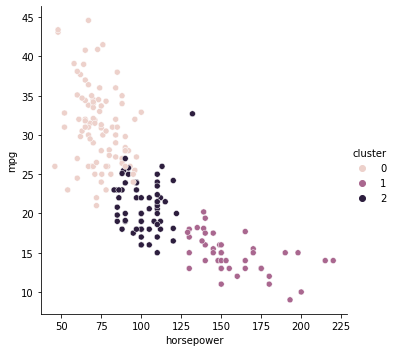

In [253]:
# horsepowerとcluster
sns.relplot(data=df_train_km3, x='horsepower', y='mpg', hue='cluster')
plt.savefig('./img/km3-horsepower-cluster.png')
plt.show()

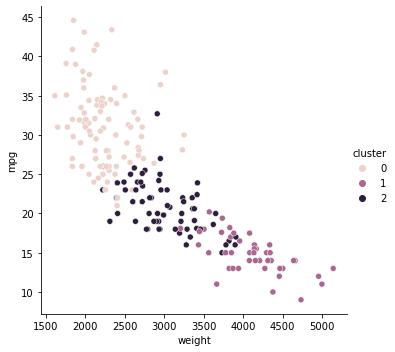

In [254]:
# weightとcluster
sns.relplot(data=df_train_km3, x='weight', y='mpg', hue='cluster')
plt.savefig('./img/km3-weight-cluster.png')
plt.show()

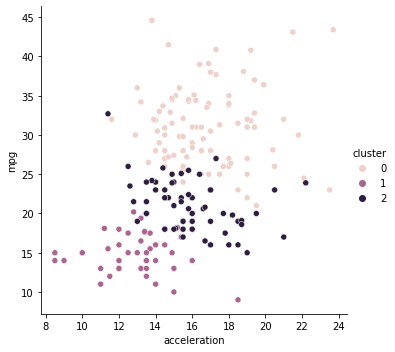

In [247]:
# accelerationとcluster
sns.relplot(data=df_train_km3, x='acceleration', y='mpg', hue='cluster')
plt.show()

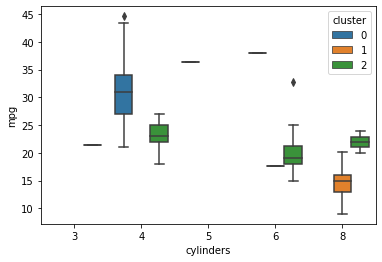

In [255]:
# cylindersとcluster
sns.boxplot(data=df_train_km3, x='cylinders', y='mpg', hue='cluster')
plt.savefig('./img/km3-cylinders-cluster.png')
plt.show()

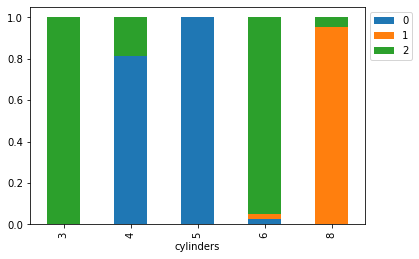

In [317]:
# 積み上げ棒グラフ
crosstable = pd.crosstab(df_train_km3.cylinders, df_train_km3.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('./img/stackedbar-cylinders-cluster.png')
plt.show()

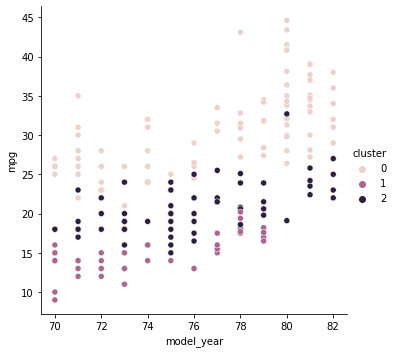

In [261]:
# model_yearとcluster
sns.relplot(data=df_train_km3, x='model_year', y='mpg', hue='cluster')
plt.savefig('./img/km3-model_year-cluster.png')
plt.show()

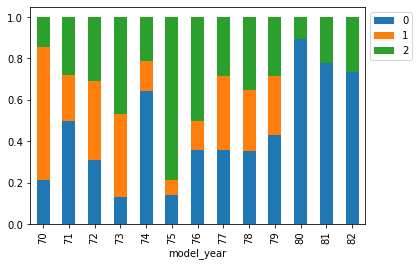

In [315]:
# 積み上げ棒グラフ
crosstable = pd.crosstab(df_train_km3.model_year, df_train_km3.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

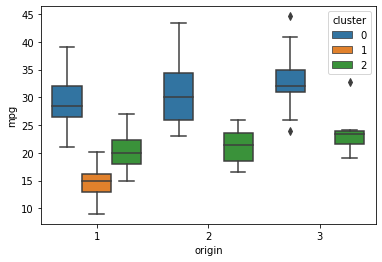

In [250]:
# originとcluster
sns.boxplot(data=df_train_km3, x='origin', y='mpg', hue='cluster')
plt.show()

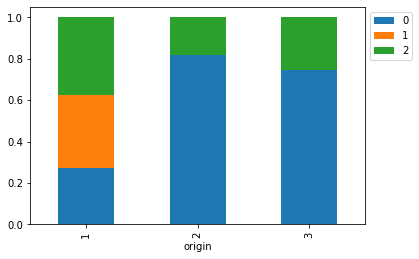

In [316]:
# 積み上げ棒グラフ
crosstable = pd.crosstab(df_train_km3.origin, df_train_km3.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [282]:
# kmeans法で分ける
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=5, random_state=0)
KM.fit(km_train_ss)
cluster = KM.predict(km_train_ss)

In [283]:
df_train_km3 = copy.copy(df_train_cy_ye)
df_train_km3['cluster'] = cluster
df_train_km3.groupby('cluster').describe()['displacement']

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,43.0,339.860465,44.341522,231.0,305.00,318.0,351.0,454.0
1,34.0,108.147059,24.724092,71.0,90.00,98.0,135.5,151.0
2,50.0,129.660000,26.168691,80.0,119.00,122.0,140.0,232.0
3,38.0,100.842105,30.400503,72.0,88.25,97.5,105.0,262.0
4,34.0,231.558824,24.141240,156.0,225.00,232.0,250.0,262.0


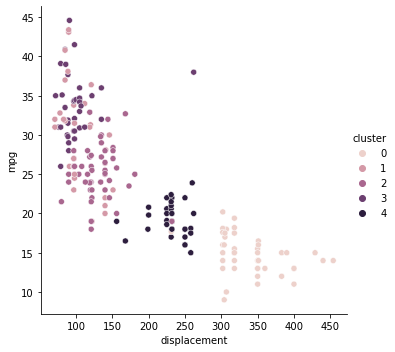

In [288]:
# displacementとcluster
sns.relplot(data=df_train_km3, x='displacement', y='mpg', hue='cluster')
plt.savefig('./img/km5-displacement-cluster.png')
plt.show()

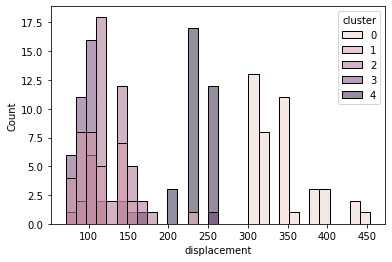

In [289]:
# displacementとcluster ヒストグラム
sns.histplot(data=df_train_km3, x='displacement', hue='cluster', bins=30)
plt.savefig('./img/km5-displacement-cluster-hist.png')
plt.show()

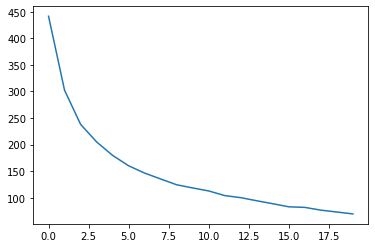

In [300]:
# エルボー図の作成
inertia = []
for i in range(2,22):
    KM = KMeans(n_clusters=i, random_state=0)
    KM.fit(km_train_ss)
    inertia.append(KM.inertia_)
    
plt.plot(inertia)
plt.savefig('./img/kmeans_elbow.png')
plt.show()

In [326]:
from sklearn.cluster import KPrototype

ImportError: cannot import name 'KPrototype' from 'sklearn.cluster' (C:\Users\doubl\anaconda3\lib\site-packages\sklearn\cluster\__init__.py)